<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
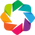

In [569]:
import holoviews as hv
# from holoviews.plotting.util import process_cmap
import numpy as np
from numpy import linalg as LA
import scipy
from scipy import linalg
from scipy.linalg import hilbert, tri
import copy
hv.extension('bokeh')
# hv.extension('bokeh','matplotlib')
# hv.extension('matplotlib')

In [570]:
# identity matrix

cmap = 'gray_r'
cmap = 'Magma_r'
cmap = 'bgyw_r'
cmap = 'blues'
# colorbar_opts = {'margin':20, 'height':200, 'width':50, 'scale_alpha':100, 'title':'test', 
#                 'padding':50, 'background_fill_color':'pink'}   # how to ruin the colorbar

colorbar_opts = {'padding':20}
options = {'Image': dict(cmap = cmap, colorbar = True, colorbar_opts = colorbar_opts, height = 380, 
                         width = 440, border = 40, xaxis = 'bottom-bare', xticks = 15, xrotation = 300, 
                         sizing_mode = "fixed", yaxis = 'left-bare')}

n = 20
unit_matrix = np.identity(n)
hv_matrix = hv.Image(unit_matrix).options(options)
hv_matrix

:Image   [x,y]   (z)

In [571]:
#hv.help(hv_matrix)

In [572]:
# banded matrix

n = 20
value_diag = 1
band_a = 2

# create banded matrix

def band_matrix_fct(n,value_diag,band_a):
    band_matrix = np.zeros((n,n))
    band_matrix[np.arange(n-1), np.arange(n-1)+1] = np.repeat(band_a,n-1)
    band_matrix[np.arange(n), np.arange(n)] = np.repeat(value_diag,n)
    band_matrix[np.arange(n), np.arange(n)-1] = np.repeat(band_a,n)
    band_matrix[n-1,0] = band_a
    return band_matrix

hv_band_matrix = hv.Image(band_matrix_fct(n,value_diag,band_a)).options(options)
hv_band_matrix

:Image   [x,y]   (z)

In [573]:
hv.help(hv_band_matrix)

Image: Image 

Online example: http://holoviews.org/reference/elements/bokeh/Image.html

---------------------
Target Specifications
---------------------

Targets in this object available for customization:

Element: Image.Image

To see the options info for one of these target specifications,
which are of the form {type}[.{group}[.{label}]], do holoviews.help({type}).

-------------
Style Options
-------------

	alpha, cmap

(Consult bokeh's documentation for more information.)

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'RasterPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                                 Value                         Type         Bounds     Mode  

apply_extents                         True                       Boolean        (0, 1)     V RW  
apply_ranges         

In [574]:
LA.cond(band_matrix_fct(n,value_diag,band_a))

21.180339887498995

In [575]:
# banded block matrix


options_divergence = copy.deepcopy(options)
options_divergence['Image']['cmap'] = 'RdBu'
options_divergence['Image']['symmetric'] = True


n = 3
value_diag = 4
band_a = -1
band_block_matrix = np.zeros((n**2,n**2))
for i in range(n):
    band_block_matrix[i*n:(i+1)*n,i*n:(i+1)*n] = band_matrix_fct(n,value_diag,band_a)
    
for i in range(n-1): 
    #print(((i+1)*n,(i+2)*n))
    band_block_matrix[(i+1)*n:(i+2)*n,i*n:(i+1)*n] = -np.identity(n)
    band_block_matrix[i*n:(i+1)*n,(i+1)*n:(i+2)*n] = -np.identity(n)
    
hv_band_block_matrix = hv.Image(band_block_matrix).options(options_divergence)
hv_band_block_matrix    

:Image   [x,y]   (z)

In [576]:
LA.cond(band_block_matrix)

10.949747468305834

In [577]:
# correlation matrix

corr_band_block_matrix = np.corrcoef(band_block_matrix)
hv_corr_band_block_matrix = hv.Image(corr_band_block_matrix).options(options_divergence)
hv_corr_band_block_matrix 

:Image   [x,y]   (z)

In [578]:
# upper and lower triangular matrix

options_left = copy.deepcopy(options)
options_left["Image"]['colorbar'] = False
options_left["Image"]['border'] = 40
options_left["Image"]['width'] = 400

n = 50
matrix = np.random.random((n,n))
matrix_tril = np.tril(matrix)
matrix_triu = np.triu(matrix)
hv_matrix_tril = hv.Image(matrix_tril).options(options_left)
hv_matrix_triu = hv.Image(matrix_triu).options(options)
hv_matrix_tril + hv_matrix_triu


:Layout
   .Image.I  :Image   [x,y]   (z)
   .Image.II :Image   [x,y]   (z)

In [579]:
# symmetric matrix with noise

n = 20
matrix = np.random.random((n,n))
matrix_tril = np.tril(matrix,0)
matrix_triu = matrix_tril.T

matrix_sym = matrix_tril + matrix_triu
matrix_sym += np.random.random((n,n))/5
hv_matrix_sym = hv.Image(matrix_sym).options(options)
hv_matrix_sym


:Image   [x,y]   (z)

In [580]:
vis_matrix_sym = np.copy(matrix_sym)
vis_matrix_sym += - np.triu(vis_matrix_sym,0) - np.triu(vis_matrix_sym,0).T

hv_vis_matrix_sym = hv.Image(abs(vis_matrix_sym)).options(options)
hv_vis_matrix_sym

:Image   [x,y]   (z)

In [581]:
# Not sure how to visualize this... using the diagonals as "range setting" is a little cheating, would like to use
# the range of cmap of previous figure.

In [582]:
#print(vis_matrix_sym)
#print('\n')
#print(np.diag(matrix_sym))

In [583]:
hv.Layout([hv_matrix_sym.options(cmap=c).relabel(c) for c in ['gray','PiYG','flag','Set1']]).cols(2)

:Layout
   .Image.Gray :Image   [x,y]   (z)
   .Image.PiYG :Image   [x,y]   (z)
   .Image.Flag :Image   [x,y]   (z)
   .Image.Set1 :Image   [x,y]   (z)

In [584]:
hv.Layout([hv_matrix_sym.options(cmap=c).relabel(c) for c in ['bone','summer','RdPu','tab20']]).cols(2)

:Layout
   .Image.Bone   :Image   [x,y]   (z)
   .Image.Summer :Image   [x,y]   (z)
   .Image.RdPu   :Image   [x,y]   (z)
   .Image.Tab20  :Image   [x,y]   (z)

In [585]:
hv.Layout([hv_matrix_sym.options(cmap=c).relabel(c) for c in ['jet','ocean','terrain','RdGy']]).cols(2)

:Layout
   .Image.Jet     :Image   [x,y]   (z)
   .Image.Ocean   :Image   [x,y]   (z)
   .Image.Terrain :Image   [x,y]   (z)
   .Image.RdGy    :Image   [x,y]   (z)

In [586]:
hv.Layout([hv_matrix_sym.options(cmap=c).relabel(c) for c in ['PiYG','bwr','RdPu','Viridis']]).cols(2)

:Layout
   .Image.PiYG    :Image   [x,y]   (z)
   .Image.Bwr     :Image   [x,y]   (z)
   .Image.RdPu    :Image   [x,y]   (z)
   .Image.Viridis :Image   [x,y]   (z)

In [587]:
# VINE METHOD to generate random correlation matrices
# Algo obtained here (and adapted to Python) : https://stats.stackexchange.com/questions/2746/how-to-efficiently-generate-random-positive-semidefinite-correlation-matrices
def vine_corr(d, eta):
    beta = eta + (d-1)/2   
    P = np.zeros((d,d))           # storing partial correlations
    S = np.identity(d)

    for k in range(d-1):
        beta = beta - 1/2
        for i in np.arange(k+1,d):
            P[k,i] = np.random.beta(beta,beta) # sampling from beta
            P[k,i] = (P[k,i]-0.5)*2     # linearly shifting to [-1, 1]
            p = P[k,i];
            for l in np.arange(k-1,-1):  # converting partial correlation to raw correlation
                p = p * np.sqrt((1-P[l,i]**2)*(1-P[l,k]**2)) + P[l,i]*P[l,k]
            S[k,i] = p
            S[i,k] = p
    return S


In [588]:
# generate correlation matrix

n = 100

corr_matrix1 = vine_corr(n,0.1)
corr_matrix2 = vine_corr(n,10)
corr_matrix3 = vine_corr(n,100)
hv_corr_matrix1 = hv.Image(corr_matrix1).options(options)
hv_corr_matrix2 = hv.Image(corr_matrix2).options(options)
hv_corr_matrix3 = hv.Image(corr_matrix3).options(options)
(hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3).cols(1)

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [589]:
# Not sure what happens in the bottom right corner...

In [590]:
np.linalg.eig(corr_matrix1)

(array([-2.21156046,  4.24600974, -1.94350723,  3.83438244, -1.62698588,
        -1.57524303,  3.62355833,  3.52503405,  3.55418807, -1.44602876,
        -1.28614991, -1.24744259,  3.28760656,  3.21181093,  3.09140828,
         3.13690055, -1.1229006 ,  2.94878871, -1.00612017, -0.93997232,
         2.85801371,  2.81854248,  2.66549875, -0.85123779, -0.83796267,
        -0.76962266, -0.72348167,  2.65695068,  2.57217392,  2.55521272,
         2.50291431,  2.46037003, -0.54111948, -0.48944982, -0.44777045,
         2.36044988, -0.37308502,  2.27698892, -0.34609446, -0.29720041,
        -0.24187229, -0.23422584,  2.1943442 ,  2.18119143,  2.12559361,
         2.04517669, -0.14461842,  1.99778697, -0.10324589, -0.08076535,
         1.98226469, -0.00857587,  1.9339009 ,  1.91802686,  1.86704202,
         1.83357127,  0.07251391,  0.13306386,  0.10495581,  1.76672367,
         1.74278451,  0.18832036,  0.20664161,  0.22137691,  0.28051836,
         1.70362389,  1.66008944,  1.62381519,  0.3

***

somehow this is not positive definite (as the author of the algo implied... or I translated it incorrectly?)

***

In [591]:
# VINE METHOD to generate random correlation matrices with permutations
# Algo obtained here (and adapted to Python) : https://stats.stackexchange.com/questions/2746/how-to-efficiently-generate-random-positive-semidefinite-correlation-matrices
def vine_corr_perm(d, eta):
    beta = eta + (d-1)/2   
    P = np.zeros((d,d))           # storing partial correlations
    S = np.identity(d)

    for k in range(d-1):
        beta = beta - 1/2
        for i in np.arange(k+1,d):
            P[k,i] = np.random.beta(beta,beta) # sampling from beta
            P[k,i] = (P[k,i]-0.5)*2     # linearly shifting to [-1, 1]
            p = P[k,i];
            for l in np.arange(k-1,-1):  # converting partial correlation to raw correlation
                p = p * np.sqrt((1-P[l,i]**2)*(1-P[l,k]**2)) + P[l,i]*P[l,k]
            S[k,i] = p
            S[i,k] = p
            
    permutation = np.random.permutation(d)
    S = S[permutation,:]
    S = S[:,permutation]        
    return S 


In [592]:
# generate correlation matrix with random permutations

n = 100

corr_matrix1 = vine_corr_perm(n,0.1)
corr_matrix2 = vine_corr_perm(n,10)
corr_matrix3 = vine_corr_perm(n,100)
hv_corr_matrix1 = hv.Image(corr_matrix1).options(options)
hv_corr_matrix2 = hv.Image(corr_matrix2).options(options)
hv_corr_matrix3 = hv.Image(corr_matrix3).options(options)
hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [593]:
# generate correlation matrix from multivariate normal random variables

def factor(d,k):
    W = np.random.multivariate_normal(mean = np.zeros(d), cov = np.identity(d), size = k)
    S = np.matmul(np.matrix.transpose(W),W) + np.diag(np.random.uniform(size = d))
    D = np.diag(1.0/np.sqrt(np.diag(S)))
    S = np.linalg.multi_dot([D,S,D])
    return S

In [594]:
# generate correlation matrix from above algo

n = 50

corr_matrix1 = factor(n,k=1)
corr_matrix2 = factor(n,k=4)
corr_matrix3 = factor(n,k=10)
hv_corr_matrix1 = hv.Image(corr_matrix1).options(options_divergence)
hv_corr_matrix2 = hv.Image(corr_matrix2).options(options_divergence)
hv_corr_matrix3 = hv.Image(corr_matrix3).options(options_divergence)
(hv_corr_matrix1 + hv_corr_matrix2 + hv_corr_matrix3).cols(2)

:Layout
   .Image.I   :Image   [x,y]   (z)
   .Image.II  :Image   [x,y]   (z)
   .Image.III :Image   [x,y]   (z)

In [595]:
LA.eig(corr_matrix1)[0]

array([  2.62858319e+01,   9.57157808e-01,   9.70882447e-01,
         9.79822563e-01,   9.98388219e-01,   9.94782552e-01,
         9.94072598e-01,   9.90575587e-01,   9.91198745e-01,
         8.87700602e-01,   8.79088183e-01,   8.39732024e-01,
         8.08773821e-01,   7.91548245e-01,   8.02085017e-01,
         7.02305459e-01,   6.75932366e-01,   6.40853445e-01,
         6.26285812e-01,   5.88371986e-01,   5.74122367e-01,
         5.54443427e-01,   5.13471424e-01,   4.98428948e-01,
         4.39519086e-01,   4.27528938e-01,   4.10298663e-01,
         1.10377957e-02,   3.52029742e-01,   3.46535334e-01,
         3.33532644e-01,   3.16814097e-01,   2.98372003e-01,
         2.69334377e-01,   2.44222900e-01,   5.47359618e-02,
         6.29201223e-02,   2.21109550e-01,   8.61687135e-02,
         9.14797019e-02,   9.93597878e-02,   1.10036330e-01,
         1.23154013e-01,   1.34616025e-01,   1.93537373e-01,
         1.85862854e-01,   1.48240389e-01,   1.56466311e-01,
         1.72080189e-01,

In [596]:
# construct a matrix for Gauss algorithm
# step 1: correlation matrix

np.random.seed(3)

n = 15
corr_matrix1 = factor(n,k=10)
hv_corr_matrix1 = hv.Image(corr_matrix1).options(options_divergence)
hv_corr_matrix1

:Image   [x,y]   (z)

In [597]:
print(np.linalg.det(corr_matrix1))
print('\n')
print(np.linalg.eig(corr_matrix1)[0])


1.21407639094e-06


[ 3.42004631  2.83698464  2.17984269  1.81968866  1.47198262  0.99186138
  0.74039458  0.46253562  0.40850958  0.32449625  0.15772679  0.08043079
  0.02185759  0.03611439  0.04752809]


In [598]:
# step two: multiply with a diagonal matrix

np.random.seed(1)
M_diag_vector = np.random.uniform(0.5,3,size = n)
M_diag = np.diag(M_diag_vector)
M = np.linalg.multi_dot([M_diag,corr_matrix1,M_diag])

#M = hilbert(n)

#print(M)
#print('\n')
#print(np.linalg.det(M))
#print('\n')
#print(np.linalg.eig(M)[0])



In [602]:
# Gauss algorithm without pivot

options_divergence2 = copy.deepcopy(options_divergence)
options_divergence2['Image']['height'] = 250
options_divergence2['Image']['width'] = 300



hv_gauss = []

A_k = M # initialize
L_k = M_k = np.identity(n)
hv_gauss.append((hv.Image(M_k) + hv.Image(A_k) + hv.Image(L_k)).options(options_divergence2).options(normalize = False))

for k in range(n-1):
    l_k = np.concatenate([np.zeros(k+1),np.squeeze(np.asarray(A_k[k+1:,k]/A_k[k,k])).reshape(n-k-1,)]) # matrix vs array vs single point... really?
    M_k = np.identity(n) - np.transpose(np.matrix(l_k)) @ np.eye(1,n,k)
    M_k_minus = np.identity(n) + np.transpose(np.matrix(l_k)) @ np.eye(1,n,k)  # inverse of M_k
    A_k = np.matmul(M_k,A_k)
    L_k = np.matmul(L_k,M_k_minus)
    hv_gauss.append((hv.Image(M_k) + hv.Image(A_k) + hv.Image(L_k)).options(options_divergence2).options(normalize = False))
    #print(M_k)
    #print('\n')
    #print(A_k)
    #print('\n')
    #print(L_k)
    #print('\n')


dict_gauss = {int(k): hv_gauss[k] for k in range(n)}

In [603]:
hv.help(hv_gauss[1])

Layout: Layout 

Online example: http://holoviews.org/reference/containers/bokeh/Layout.html

---------------------
Target Specifications
---------------------

Targets in this object available for customization:

Element: Image.Image

Container: Layout.Layout

To see the options info for one of these target specifications,
which are of the form {type}[.{group}[.{label}]], do holoviews.help({type}).

-------------
Style Options
-------------

	<No style options available>

------------
Plot Options
------------

The plot options are the parameters of the plotting class:

Parameters of 'LayoutPlot'

Parameters changed from their default values are marked in red.
Soft bound values are marked in cyan.
C/V= Constant/Variable, RO/RW = ReadOnly/ReadWrite, AN=Allow None

Name                            Value                    Type       Bounds    Mode  

fontsize                  {'title': '16pt'}           Parameter             V RW AN 
height                           300                  

In [604]:
hv.HoloMap(dict_gauss, kdims = ['Iteration']).collate().cols(1)

:Layout
   .Image.I   :HoloMap   [Iteration]
      :Image   [x,y]   (z)
   .Image.II  :HoloMap   [Iteration]
      :Image   [x,y]   (z)
   .Image.III :HoloMap   [Iteration]
      :Image   [x,y]   (z)

In [556]:
hilbert(3)

array([[ 1.        ,  0.5       ,  0.33333333],
       [ 0.5       ,  0.33333333,  0.25      ],
       [ 0.33333333,  0.25      ,  0.2       ]])

In [557]:
n = 20
hv.Image(hilbert(n))

:Image   [x,y]   (z)